<a href="https://colab.research.google.com/github/swatigawale/Assignment-7-Clustering-/blob/main/Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1.Perform Clustering for the crime data and identify the number of clusters formed and draw inferences**

In [ ]:
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float, array
import numpy as np
import seaborn as sns

In [ ]:
crime = pd.read_csv("crime_data.csv")

In [ ]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
crime.shape

(50, 5)

In [ ]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:])
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [ ]:
z = linkage(df_norm, method="complete",metric="euclidean")

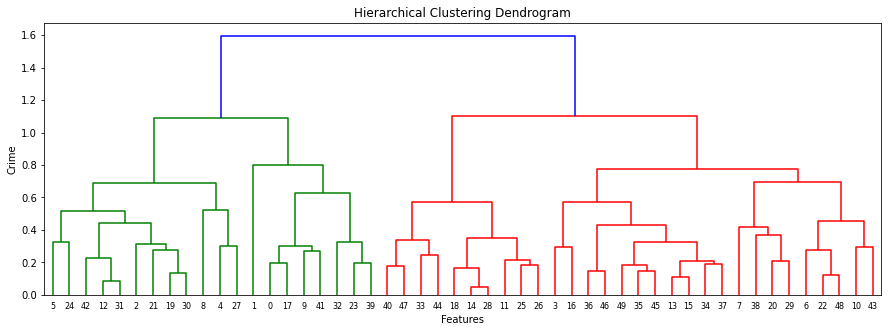

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
crime.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [ ]:
###### screw plot or elbow curve ############
k = list(range(2,15))
#k

In [ ]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [ ]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x7f9e1a04c710>,
 <a list of 13 Text major ticklabel objects>)

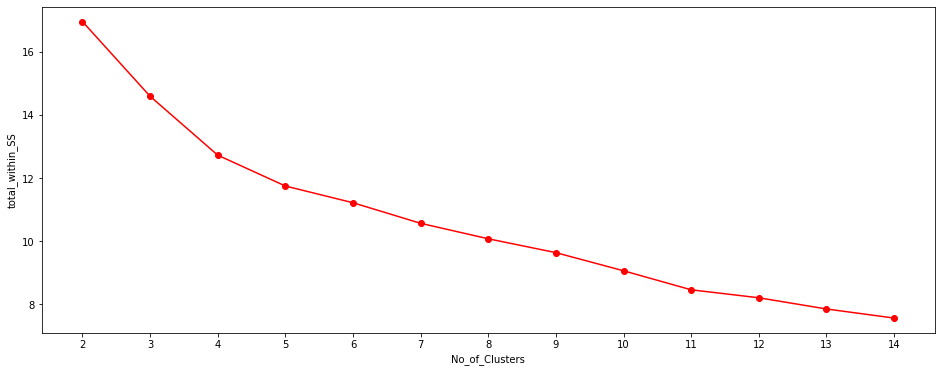

In [ ]:
# Scree plot 

plt.figure(figsize=(16,6))
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

**#The elbow appear to be smoothening out after four clusters indicating that the optimal number of clusters is 4.**

In [ ]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=4) 
model.fit(df_norm)

KMeans(n_clusters=4)

In [ ]:
import sklearn


In [ ]:
pip install -U scikit-learn

In [ ]:
model.labels_ # getting the labels of clusters assigned to each row 

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [ ]:
model.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [ ]:
import seaborn as sns

In [ ]:
X = crime[['Murder', 'Assault', 'Rape', 'UrbanPop']]
clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_
crime['Crime_clusters'] = clusters.labels_
crime.head()
crime.sort_values(by=['Crime_clusters'],ascending = True)
X.head()


,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [ ]:
stats =crime.sort_values("Murder", ascending=True)
stats

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Crime_clusters
33,North Dakota,0.8,45,44,7.3,0
28,New Hampshire,2.1,57,56,9.5,0
18,Maine,2.1,83,51,7.8,0
14,Iowa,2.2,56,57,11.3,0
44,Vermont,2.2,48,32,11.2,0
48,Wisconsin,2.6,53,66,10.8,0
11,Idaho,2.6,120,54,14.2,3
22,Minnesota,2.7,72,66,14.9,0
43,Utah,3.2,120,80,22.9,3
6,Connecticut,3.3,110,77,11.1,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


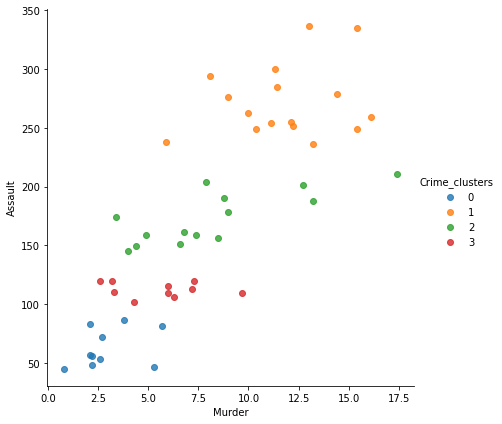

In [ ]:
# Plot between pairs Murder~Assault
sns.lmplot( 'Murder','Assault',  data=crime,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


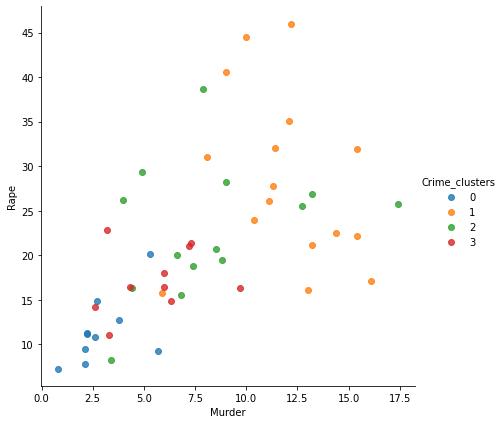

In [ ]:
# Plot between pairs Murder~Rape
sns.lmplot( 'Murder','Rape',  data=crime,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


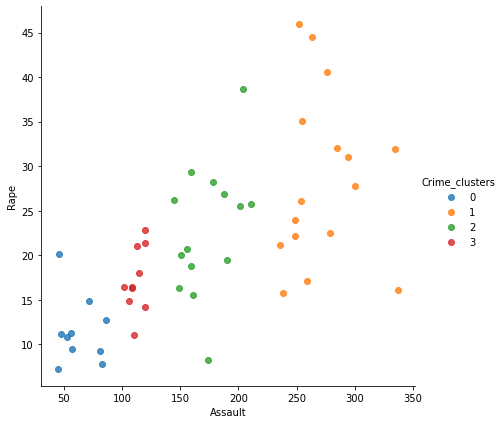

In [ ]:
# Plot between pairs Assault~Rape
sns.lmplot( 'Assault','Rape',  data=crime,
        hue = 'Crime_clusters',
        fit_reg=False, size = 6 );

**All dots are states of US and different colors are one cluster showing clustering for the crime data.**

**Q2.Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters.**

**Draw the inferences from the clusters obtained**

In [ ]:

air = pd.read_csv("EastWestAirlines.csv")

In [ ]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
air.shape

(3999, 12)

In [ ]:
# Normalization function 
def norm_func1(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
# Normalized data frame (considering the numerical part of data)
df_norm1 = norm_func1(air.iloc[:,1:])
df_norm1.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [ ]:
z1 = linkage(df_norm1, method="complete",metric="euclidean")

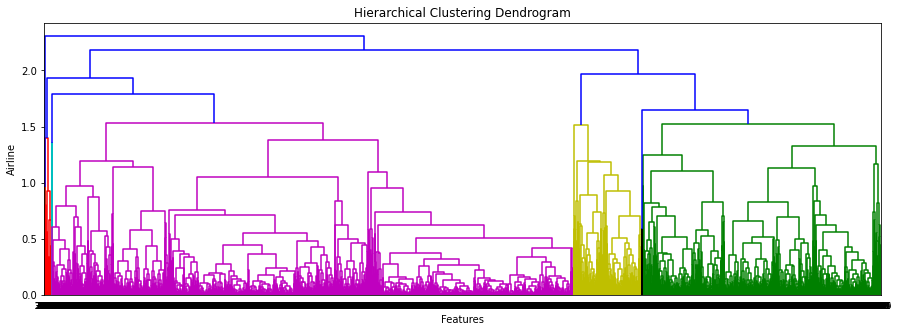

In [ ]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Airline')
sch.dendrogram(z1,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
air.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [ ]:
###### screw plot or elbow curve ############
k1 = list(range(2,20))
#k

In [ ]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k1:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x7f9e18dc1dd0>,
 <a list of 18 Text major ticklabel objects>)

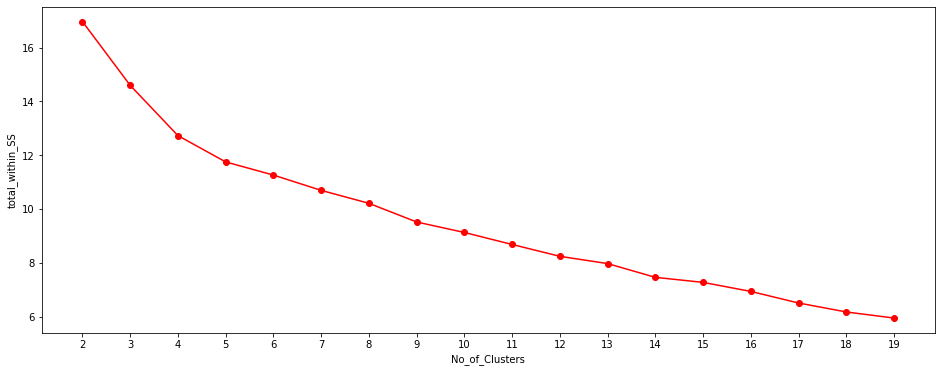

In [ ]:
# Scree plot 

plt.figure(figsize=(16,6))
plt.plot(k1,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k1)

In [ ]:
X1 = air[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']]
clusters = KMeans(4)  # 4 clusters!
clusters.fit( X1 )
clusters.cluster_centers_
clusters.labels_
air['air_clusters'] = clusters.labels_
air.head()
air.sort_values(by=['air_clusters'],ascending = True)
X1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
stats1 =air.sort_values("Days_since_enroll", ascending=True)
stats1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,air_clusters
3697,3720,972,972,1,1,1,0,0,0,0,2,0,0
3696,3719,862,0,1,1,1,0,0,0,0,8,0,0
3722,3745,3230,0,1,1,1,0,0,0,0,10,0,0
3725,3748,2627,0,1,1,1,0,0,0,0,25,0,0
3747,3770,6015,4929,1,1,1,0,0,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,416,620498,0,5,1,1,25395,53,1750,14,8296,1,3
409,415,10732,0,1,1,1,1296,6,0,0,8296,0,0
408,414,5581,0,1,1,1,0,0,0,0,8296,0,0
415,421,109087,0,2,1,1,10462,16,0,0,8296,1,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


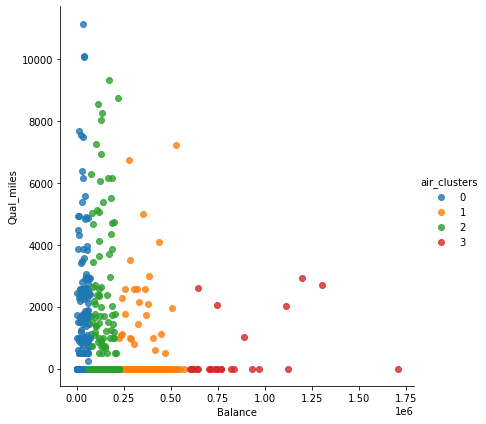

In [ ]:
# Plot between pairs Balance~Qual_miles
sns.lmplot( 'Balance','Qual_miles',  data=air,
        hue = 'air_clusters',
        fit_reg=False, size = 6 );

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


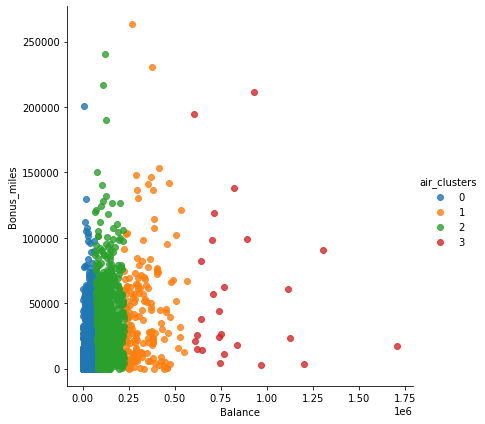

In [ ]:
# Plot between pairs Balance~Bonus_miles
sns.lmplot( 'Balance','Bonus_miles',  data=air,
        hue = 'air_clusters',
        fit_reg=False, size = 6 );

**Graph shows clearly (X, Y) axis variables in air_clusters**

In [ ]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model1=KMeans(n_clusters=4) 
model1.fit(df_norm1)

KMeans(n_clusters=4)

In [ ]:
model1.labels_ # getting the labels of clusters assigned to each row 

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [ ]:
model1.cluster_centers_

array([[ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01,  7.21644966e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -2.77555756e-16]])